In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web

In [186]:
# Getting price data from excel file
# df = pd.read_excel(r'project.xlsx')
# price_data = df
# price_data = price_data.drop(columns = ['Year', 'Month', 'REIT', 'PM', 'EAFE', 'VWRET', 'SPRET', 'TBILL'])
# price_data.head()

ticker = ['AMZN', 'AAPL', 'NFLX', 'GOOG', 'F']
price_data = web.get_data_yahoo(ticker,
                           start = '2014-01-01',
                           end = '2019-01-01')['Adj Close']

In [187]:
#calculating log returns
log_ret = np.log(price_data/price_data.shift(1))
log_ret.head()

Symbols,AMZN,AAPL,NFLX,GOOG,F
Date,,,,,
2013-12-31,NaN,NaN,NaN,NaN,NaN
2014-01-02,-0.002058,-0.014164,-0.014638,-0.006796,0.000648
2014-01-03,-0.003852,-0.022211,0.000771,-0.007322,0.004524
2014-01-06,-0.007113,0.005438,-0.009769,0.011088,0.004503
2014-01-07,0.011116,-0.007178,-0.057435,0.019095,-0.012920


In [188]:
#correlaion matrix
corr_mat = log_ret.corr()
print (corr_mat)

Symbols      AMZN      AAPL      NFLX      GOOG         F
Symbols                                                  
AMZN     1.000000  0.430362  0.453641  0.623503  0.290659
AAPL     0.430362  1.000000  0.333213  0.473584  0.296820
NFLX     0.453641  0.333213  1.000000  0.465337  0.210053
GOOG     0.623503  0.473584  0.465337  1.000000  0.332357
F        0.290659  0.296820  0.210053  0.332357  1.000000


In [189]:
#covariance matrix
cov_mat = log_ret.cov()*252
print (cov_mat)

Symbols      AMZN      AAPL      NFLX      GOOG         F
Symbols                                                  
AMZN     0.095210  0.031783  0.059857  0.044820  0.020807
AAPL     0.031783  0.057286  0.034104  0.026407  0.016482
NFLX     0.059857  0.034104  0.182862  0.046358  0.020839
GOOG     0.044820  0.026407  0.046358  0.054273  0.017963
F        0.020807  0.016482  0.020839  0.017963  0.053824


In [199]:
# Simulating 5000 portfolios
num_port = 50
# Creating an empty array to store portfolio weights
all_wts = np.zeros((num_port, len(price_data.columns)))
# Creating an empty array to store portfolio returns
port_returns = np.zeros((num_port))
# Creating an empty array to store portfolio risks
port_risk = np.zeros((num_port))
# Creating an empty array to store portfolio sharpe ratio
sharpe_ratio = np.zeros((num_port))

In [200]:
for i in range(num_port):
        wts = np.random.uniform(size = len(price_data.columns))
        wts = wts/np.sum(wts)
  
      # saving weights in the array
        all_wts[i,:] = wts
  
      # Portfolio Returns
  
        port_ret = np.sum(log_ret.mean() * wts)
        port_ret = (port_ret + 1) ** 252 - 1
  
      # Saving Portfolio returns
        port_returns[i] = port_ret
  
      # Portfolio Risk
        port_sd = np.sqrt(np.dot(wts.T, np.dot(cov_mat, wts)))
        port_risk[i] = port_sd
        
    # Portfolio Sharpe Ratio
    # Assuming 0% Risk Free Rate
        sr = port_ret / port_sd
        sharpe_ratio[i] = sr

In [201]:
names = price_data.columns
min_var = all_wts[port_risk.argmin()]
print(min_var)

[0.04603147 0.24310993 0.03213503 0.28439519 0.39432838]


In [202]:
max_sr = all_wts[sharpe_ratio.argmax()]
print(max_sr)

[0.47265406 0.01782921 0.38440504 0.12201515 0.00309654]


In [203]:
print(sharpe_ratio.max())

1.0768903097421059


In [204]:
print(port_risk.min())

0.17916892323540257


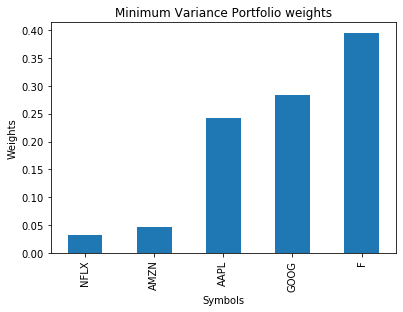

In [205]:
min_var = pd.Series(min_var, index=names)
min_var = min_var.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Minimum Variance Portfolio weights")
min_var.plot(kind = 'bar')
plt.show();

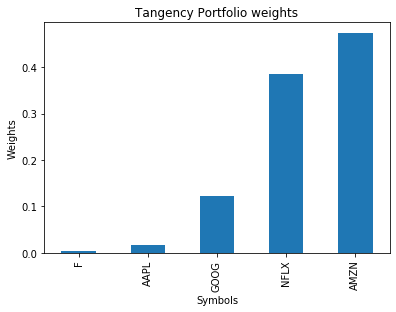

In [206]:
max_sr = pd.Series(max_sr, index=names)
max_sr = max_sr.sort_values()
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Asset')
ax1.set_ylabel("Weights")
ax1.set_title("Tangency Portfolio weights")
max_sr.plot(kind = 'bar')
plt.show();

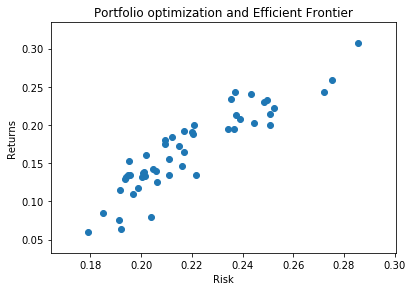

In [207]:
fig = plt.figure()
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
ax1.set_xlabel('Risk')
ax1.set_ylabel("Returns")
ax1.set_title("Portfolio optimization and Efficient Frontier")
plt.scatter(port_risk, port_returns)
plt.show()